# Study of corrosion rates of Bronze in HNO3 Environment


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = [[0,4.901,588],[3,4.889,580],[7,4.877,575],[11,4.869,561],[14,4.859,536],[17,4.851,458]]
corrosion_data = pd.DataFrame(data,columns=['Days','Weight(g)','PD(mv)'])

In [3]:
corrosion_data

,Days,Weight(g),PD(mv)
0,0,4.901,588
1,3,4.889,580
2,7,4.877,575
3,11,4.869,561
4,14,4.859,536
5,17,4.851,458


In [4]:
# To calculate the weight loss
# Initial Weight of bronze(Wi) = 4.901g
# Weight_loss = Wi-W
Wi = 4.901
corrosion_data['Weight_loss(g)'] = Wi- corrosion_data['Weight(g)']

# To convert P.D to Standard hydrogen electrode(SHE) : PD - 1038
# mv : milli_volts
corrosion_data['SHE(mv)'] = corrosion_data['PD(mv)'] - 1038

# To calculate the cumulative weight loss(g)
def cumulative_points(points): # a function to perform cumulative_points.
    cumulative_list = []
    total = 0
    for point in points:
        total += point
        cumulative_list.append(total)
    return cumulative_list
corrosion_data['Cumulative_weight_loss(g)']= cumulative_points(corrosion_data['Weight_loss(g)'])

corrosion_data

,Days,Weight(g),PD(mv),Weight_loss(g),SHE(mv),Cumulative_weight_loss(g)
0,0,4.901,588,0.000,-450,0.000
1,3,4.889,580,0.012,-458,0.012
2,7,4.877,575,0.024,-463,0.036
3,11,4.869,561,0.032,-477,0.068
4,14,4.859,536,0.042,-502,0.110
5,17,4.851,458,0.050,-580,0.160


In [5]:
# To calculate corrosion rate. lenth= l, breadth = b, thickness = t, Total surface area = A, density= e: all in millimeters
l = 22.7
b = 9.8
t = 2.8
# using A= 2lt + 2bt + 2lb
A = 234.92
K = 87500
e = 8.73

corrosion_data['Corrosion_rates(mm/year)'] = round((K*corrosion_data['Weight_loss(g)']) / (A*e*(corrosion_data['Days']/365)), 3)
corrosion_data

,Days,Weight(g),PD(mv),Weight_loss(g),SHE(mv),Cumulative_weight_loss(g),Corrosion_rates(mm/year)
0,0,4.901,588,0.000,-450,0.000,NaN
1,3,4.889,580,0.012,-458,0.012,62.291
2,7,4.877,575,0.024,-463,0.036,53.392
3,11,4.869,561,0.032,-477,0.068,45.303
4,14,4.859,536,0.042,-502,0.110,46.718
5,17,4.851,458,0.050,-580,0.160,45.802


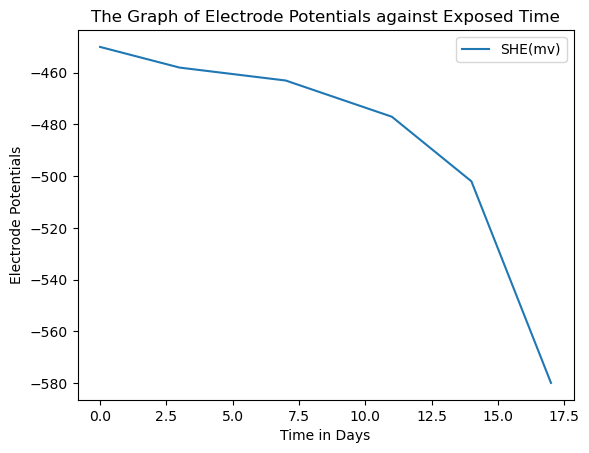

In [6]:
corrosion_data.plot.line(x='Days', y='SHE(mv)')
plt.title('The Graph of Electrode Potentials against Exposed Time')
plt.xlabel('Time in Days')
plt.ylabel('Electrode Potentials')
plt.show()

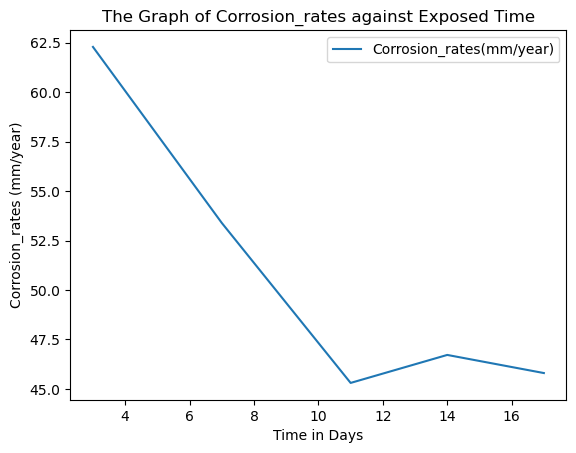

In [7]:
corrosion_data.plot.line(x='Days', y='Corrosion_rates(mm/year)')
plt.title('The Graph of Corrosion_rates against Exposed Time')
plt.xlabel('Time in Days')
plt.ylabel('Corrosion_rates (mm/year)')
plt.show()